In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_context("paper")

In [2]:
dna_stats = pd.read_csv("pigeon1.0.dna.stats.csv.gz")

In [3]:
dna_stats

,name,ksize,scaled,num_hashes,genome_length
0,SPRUCE_viral_seq_0,21,100,11276,1145228
1,SPRUCE_viral_seq_0,21,200,5632,1145228
2,SPRUCE_viral_seq_0,21,1000,1119,1145228
3,SPRUCE_viral_seq_0,21,2000,532,1145228
4,SPRUCE_viral_seq_0,21,10000,95,1145228
...,...,...,...,...,...
4002070,EarthsVirome_55316,51,100,104,10000
4002071,EarthsVirome_55316,51,200,56,10000
4002072,EarthsVirome_55316,51,1000,12,10000
4002073,EarthsVirome_55316,51,2000,9,10000


In [4]:
dna_stats["name"].nunique()

266805

In [5]:
dna_stats[dna_stats["name"] == "SPRUCE_viral_seq_0"]

,name,ksize,scaled,num_hashes,genome_length
0,SPRUCE_viral_seq_0,21,100,11276,1145228
1,SPRUCE_viral_seq_0,21,200,5632,1145228
2,SPRUCE_viral_seq_0,21,1000,1119,1145228
3,SPRUCE_viral_seq_0,21,2000,532,1145228
4,SPRUCE_viral_seq_0,21,10000,95,1145228
5,SPRUCE_viral_seq_0,31,100,11458,1145228
6,SPRUCE_viral_seq_0,31,200,5723,1145228
7,SPRUCE_viral_seq_0,31,1000,1175,1145228
8,SPRUCE_viral_seq_0,31,2000,584,1145228
9,SPRUCE_viral_seq_0,31,10000,125,1145228


In [6]:
dna_stats[dna_stats["num_hashes"] == 0]["scaled"].unique()

array([10000,  2000,  1000])

In [7]:
summary_stats = dna_stats.groupby(by=["ksize", "scaled"], dropna=False)

In [8]:
summary_stats["num_hashes"].describe()

count        mean         std   min    25%    50%    75%  \
ksize scaled                                                                
21    100     266805.0  237.134825  206.138276  10.0  126.0  173.0  279.0   
      200     266805.0  118.584093  103.354214   4.0   63.0   87.0  140.0   
      1000    266805.0   23.714923   21.124966   0.0   12.0   18.0   28.0   
      2000    266805.0   11.850411   10.835883   0.0    6.0    9.0   14.0   
      10000   266805.0    2.366942    2.560759   0.0    1.0    2.0    3.0   
31    100     266805.0  237.023384  206.296594  16.0  126.0  173.0  279.0   
      200     266805.0  118.513397  103.544051   7.0   63.0   87.0  140.0   
      1000    266805.0   23.688964   21.189634   0.0   12.0   18.0   28.0   
      2000    266805.0   11.841277   10.891555   0.0    6.0    9.0   14.0   
      10000   266805.0    2.371035    2.592161   0.0    1.0    2.0    3.0   
51    100     266805.0  236.674935  206.091338   7.0  126.0  172.0  279.0   
      200     266805.0  118.323229  103.309798   3.0   63.0   86.0  139.0   
      1000    266805.0   23.682281   21.130977   0.0   12.0   18.0   28.0   
      2000    266805.0   11.847555   10.854827   0.0    6.0    9.0   14.0   
      10000   266805.0    2.370998    2.563360   0.0    1.0    2.0    3.0   

                  max  
ksize scaled           
21    100     11276.0  
      200      5632.0  
      1000     1119.0  
      2000      532.0  
      10000      95.0  
31    100     11458.0  
      200      5723.0  
      1000     1175.0  
      2000      584.0  
      10000     125.0  
51    100     11322.0  
      200      5663.0  
      1000     1096.0  
      2000      547.0  
      10000     128.0

In [9]:
summary_stats["num_hashes"].describe().drop(columns=["count"])

mean         std   min    25%    50%    75%      max
ksize scaled                                                            
21    100     237.134825  206.138276  10.0  126.0  173.0  279.0  11276.0
      200     118.584093  103.354214   4.0   63.0   87.0  140.0   5632.0
      1000     23.714923   21.124966   0.0   12.0   18.0   28.0   1119.0
      2000     11.850411   10.835883   0.0    6.0    9.0   14.0    532.0
      10000     2.366942    2.560759   0.0    1.0    2.0    3.0     95.0
31    100     237.023384  206.296594  16.0  126.0  173.0  279.0  11458.0
      200     118.513397  103.544051   7.0   63.0   87.0  140.0   5723.0
      1000     23.688964   21.189634   0.0   12.0   18.0   28.0   1175.0
      2000     11.841277   10.891555   0.0    6.0    9.0   14.0    584.0
      10000     2.371035    2.592161   0.0    1.0    2.0    3.0    125.0
51    100     236.674935  206.091338   7.0  126.0  172.0  279.0  11322.0
      200     118.323229  103.309798   3.0   63.0   86.0  139.0   5663.0
      1000     23.682281   21.130977   0.0   12.0   18.0   28.0   1096.0
      2000     11.847555   10.854827   0.0    6.0    9.0   14.0    547.0
      10000     2.370998    2.563360   0.0    1.0    2.0    3.0    128.0

In [10]:
summary_stats["num_hashes"].describe()

count        mean         std   min    25%    50%    75%  \
ksize scaled                                                                
21    100     266805.0  237.134825  206.138276  10.0  126.0  173.0  279.0   
      200     266805.0  118.584093  103.354214   4.0   63.0   87.0  140.0   
      1000    266805.0   23.714923   21.124966   0.0   12.0   18.0   28.0   
      2000    266805.0   11.850411   10.835883   0.0    6.0    9.0   14.0   
      10000   266805.0    2.366942    2.560759   0.0    1.0    2.0    3.0   
31    100     266805.0  237.023384  206.296594  16.0  126.0  173.0  279.0   
      200     266805.0  118.513397  103.544051   7.0   63.0   87.0  140.0   
      1000    266805.0   23.688964   21.189634   0.0   12.0   18.0   28.0   
      2000    266805.0   11.841277   10.891555   0.0    6.0    9.0   14.0   
      10000   266805.0    2.371035    2.592161   0.0    1.0    2.0    3.0   
51    100     266805.0  236.674935  206.091338   7.0  126.0  172.0  279.0   
      200     266805.0  118.323229  103.309798   3.0   63.0   86.0  139.0   
      1000    266805.0   23.682281   21.130977   0.0   12.0   18.0   28.0   
      2000    266805.0   11.847555   10.854827   0.0    6.0    9.0   14.0   
      10000   266805.0    2.370998    2.563360   0.0    1.0    2.0    3.0   

                  max  
ksize scaled           
21    100     11276.0  
      200      5632.0  
      1000     1119.0  
      2000      532.0  
      10000      95.0  
31    100     11458.0  
      200      5723.0  
      1000     1175.0  
      2000      584.0  
      10000     125.0  
51    100     11322.0  
      200      5663.0  
      1000     1096.0  
      2000      547.0  
      10000     128.0

In [11]:
summary_stats.agg({"num_hashes": ["min", "max", "median", "skew"]}),
                   #"genome_length": ["min", "max", "median", "mean"],})

(             num_hashes                        
                     min    max median      skew
 ksize scaled                                   
 21    100            10  11276    173  7.385624
       200             4   5632     87  7.323007
       1000            0   1119     18  6.925635
       2000            0    532      9  6.582196
       10000           0     95      2  4.494145
 31    100            16  11458    173  7.430552
       200             7   5723     87  7.450289
       1000            0   1175     18  7.084589
       2000            0    584      9  6.751797
       10000           0    125      2  4.877108
 51    100             7  11322    172  7.386627
       200             3   5663     86  7.335370
       1000            0   1096     18  6.952002
       2000            0    547      9  6.572726
       10000           0    128      2  4.750960,)

In [12]:
summary_stats.agg({"genome_length": ["min", "max", "median", "mean"],})

genome_length                              
                       min      max median          mean
ksize scaled                                            
21    100             1609  1145228  17304  23902.672337
      200             1609  1145228  17304  23902.672337
      1000            1609  1145228  17304  23902.672337
      2000            1609  1145228  17304  23902.672337
      10000           1609  1145228  17304  23902.672337
31    100             1609  1145228  17304  23902.672337
      200             1609  1145228  17304  23902.672337
      1000            1609  1145228  17304  23902.672337
      2000            1609  1145228  17304  23902.672337
      10000           1609  1145228  17304  23902.672337
51    100             1609  1145228  17304  23902.672337
      200             1609  1145228  17304  23902.672337
      1000            1609  1145228  17304  23902.672337
      2000            1609  1145228  17304  23902.672337
      10000           1609  1145228  17304  23902.672337

In [13]:
prot_stats = pd.read_csv("pigeon1.0.protein.stats.csv.gz")

In [14]:
prot_stats["name"].nunique()

266805

In [15]:
prot_stats[prot_stats["name"] == "SPRUCE_viral_seq_0"]

,name,ksize,scaled,num_hashes,genome_length
0,SPRUCE_viral_seq_0,7,100,2999,319532
1,SPRUCE_viral_seq_0,7,200,1523,319532
2,SPRUCE_viral_seq_0,7,500,600,319532
3,SPRUCE_viral_seq_0,7,1000,326,319532
4,SPRUCE_viral_seq_0,7,2000,161,319532
...,...,...,...,...,...
91,SPRUCE_viral_seq_0,42,200,1371,319532
92,SPRUCE_viral_seq_0,42,500,568,319532
93,SPRUCE_viral_seq_0,42,1000,293,319532
94,SPRUCE_viral_seq_0,42,2000,136,319532


In [16]:
prot_summary = prot_stats.groupby(by=["ksize", "scaled"], dropna=False)

In [17]:
prot_summary["num_hashes"].describe()

count       mean        std  min   25%   50%   75%     max
ksize scaled                                                               
7     100     266805.0  72.346197  61.920999  0.0  39.0  54.0  86.0  2999.0
      200     266805.0  36.083361  31.202482  0.0  19.0  27.0  43.0  1523.0
      500     266805.0  14.418272  12.773710  0.0   7.0  11.0  17.0   600.0
      1000    266805.0   7.212845   6.673493  0.0   3.0   6.0   9.0   326.0
      2000    266805.0   3.591237   3.583001  0.0   1.0   3.0   5.0   161.0
...                ...        ...        ...  ...   ...   ...   ...     ...
42    200     266805.0  30.998505  27.136488  0.0  16.0  23.0  37.0  1371.0
      500     266805.0  12.424673  11.214535  0.0   6.0   9.0  15.0   568.0
      1000    266805.0   6.215483   5.878180  0.0   3.0   5.0   8.0   293.0
      2000    266805.0   3.094979   3.178756  0.0   1.0   2.0   4.0   136.0
      10000   266805.0   0.615483   0.946356  0.0   0.0   0.0   1.0    28.0

[96 rows x 8 columns]

In [18]:
prot_summary["num_hashes"].describe().drop(columns=["count"])

mean        std  min   25%   50%   75%     max
ksize scaled                                                     
7     100     72.346197  61.920999  0.0  39.0  54.0  86.0  2999.0
      200     36.083361  31.202482  0.0  19.0  27.0  43.0  1523.0
      500     14.418272  12.773710  0.0   7.0  11.0  17.0   600.0
      1000     7.212845   6.673493  0.0   3.0   6.0   9.0   326.0
      2000     3.591237   3.583001  0.0   1.0   3.0   5.0   161.0
...                 ...        ...  ...   ...   ...   ...     ...
42    200     30.998505  27.136488  0.0  16.0  23.0  37.0  1371.0
      500     12.424673  11.214535  0.0   6.0   9.0  15.0   568.0
      1000     6.215483   5.878180  0.0   3.0   5.0   8.0   293.0
      2000     3.094979   3.178756  0.0   1.0   2.0   4.0   136.0
      10000    0.615483   0.946356  0.0   0.0   0.0   1.0    28.0

[96 rows x 7 columns]

In [19]:
prot_summary["num_hashes"].describe()

count       mean        std  min   25%   50%   75%     max
ksize scaled                                                               
7     100     266805.0  72.346197  61.920999  0.0  39.0  54.0  86.0  2999.0
      200     266805.0  36.083361  31.202482  0.0  19.0  27.0  43.0  1523.0
      500     266805.0  14.418272  12.773710  0.0   7.0  11.0  17.0   600.0
      1000    266805.0   7.212845   6.673493  0.0   3.0   6.0   9.0   326.0
      2000    266805.0   3.591237   3.583001  0.0   1.0   3.0   5.0   161.0
...                ...        ...        ...  ...   ...   ...   ...     ...
42    200     266805.0  30.998505  27.136488  0.0  16.0  23.0  37.0  1371.0
      500     266805.0  12.424673  11.214535  0.0   6.0   9.0  15.0   568.0
      1000    266805.0   6.215483   5.878180  0.0   3.0   5.0   8.0   293.0
      2000    266805.0   3.094979   3.178756  0.0   1.0   2.0   4.0   136.0
      10000   266805.0   0.615483   0.946356  0.0   0.0   0.0   1.0    28.0

[96 rows x 8 columns]

In [20]:
prot_summary.agg({"num_hashes": ["min", "max", "median", "skew"]}),
                   #"genome_length": ["min", "max", "median", "mean"],})

(             num_hashes                       
                     min   max median      skew
 ksize scaled                                  
 7     100             0  2999     54  6.624329
       200             0  1523     27  6.503102
       500             0   600     11  6.145290
       1000            0   326      6  5.810804
       2000            0   161      3  5.145166
 ...                 ...   ...    ...       ...
 42    200             0  1371     23  6.490615
       500             0   568      9  6.186510
       1000            0   293      5  5.576874
       2000            0   136      2  4.646099
       10000           0    28      0  2.933838
 
 [96 rows x 4 columns],)

In [21]:
prot_summary.agg({"genome_length": ["min", "max", "median", "mean"],})

genome_length                            
                       min     max median         mean
ksize scaled                                          
7     100                0  319532   5460  7482.319503
      200                0  319532   5460  7482.319503
      500                0  319532   5460  7482.319503
      1000               0  319532   5460  7482.319503
      2000               0  319532   5460  7482.319503
...                    ...     ...    ...          ...
42    200                0  319532   5460  7482.319503
      500                0  319532   5460  7482.319503
      1000               0  319532   5460  7482.319503
      2000               0  319532   5460  7482.319503
      10000              0  319532   5460  7482.319503

[96 rows x 4 columns]

## Remove genomes with no predicted proteins, do summary stats again

In [28]:
protstats = prot_stats[prot_stats["genome_length"] >0]

In [29]:
protstats["name"].nunique()

266802

In [39]:
protstats["ksize"].unique()

array([ 7,  8,  9, 10, 11, 12, 15, 16, 17, 18, 19, 33, 35, 37, 39, 42])

In [40]:
protstats # k 7-> 12 prot, 15-->19 dayhoff, 33--> 42 hp

,name,ksize,scaled,num_hashes,genome_length
0,SPRUCE_viral_seq_0,7,100,2999,319532
1,SPRUCE_viral_seq_0,7,200,1523,319532
2,SPRUCE_viral_seq_0,7,500,600,319532
3,SPRUCE_viral_seq_0,7,1000,326,319532
4,SPRUCE_viral_seq_0,7,2000,161,319532
...,...,...,...,...,...
25613275,EarthsVirome_55316,42,200,13,3233
25613276,EarthsVirome_55316,42,500,5,3233
25613277,EarthsVirome_55316,42,1000,1,3233
25613278,EarthsVirome_55316,42,2000,0,3233


In [41]:
prot_only = protstats[protstats["ksize"] < 15]

In [60]:
prot_only_no10k = prot_only[prot_only["scaled"] < 10000]

In [44]:
prot_only_nohashes = prot_only[prot_only["num_hashes"] == 0]

In [62]:
prot_only_nohashes_no10k = prot_only_no10k[prot_only_no10k["num_hashes"] == 0]

In [48]:
prot_only_nohashes.groupby(by=["ksize", "scaled"], dropna=False)["num_hashes"].count()

ksize  scaled
7      100            3
       200            5
       500          178
       1000        3352
       2000       22847
       10000     144141
8      100            3
       200            5
       500          153
       1000        3426
       2000       22829
       10000     143567
9      100            3
       200            4
       500          132
       1000        3594
       2000       23377
       10000     145635
10     100            2
       200            5
       500          153
       1000        3556
       2000       23626
       10000     144628
11     100            2
       200            7
       500          163
       1000        3654
       2000       23507
       10000     144128
12     100            3
       200            6
       500          157
       1000        3759
       2000       23988
       10000     145266
Name: num_hashes, dtype: int64

In [66]:
# number of sigs with zero hashes
prot_only_nohashes_no10k.groupby(by=["ksize", "scaled"], dropna=False)["num_hashes"].count()

ksize  scaled
7      100           3
       200           5
       500         178
       1000       3352
       2000      22847
8      100           3
       200           5
       500         153
       1000       3426
       2000      22829
9      100           3
       200           4
       500         132
       1000       3594
       2000      23377
10     100           2
       200           5
       500         153
       1000       3556
       2000      23626
11     100           2
       200           7
       500         163
       1000       3654
       2000      23507
12     100           3
       200           6
       500         157
       1000       3759
       2000      23988
Name: num_hashes, dtype: int64

In [42]:
psum = prot_only.groupby(by=["ksize", "scaled"], dropna=False)

In [63]:
psum_no10k = prot_only_no10k.groupby(by=["ksize", "scaled"], dropna=False)

In [43]:
psum["num_hashes"].describe()

count       mean        std  min   25%   50%   75%     max
ksize scaled                                                               
7     100     266802.0  72.347010  61.920872  0.0  39.0  54.0  86.0  2999.0
      200     266802.0  36.083766  31.202423  0.0  19.0  27.0  43.0  1523.0
      500     266802.0  14.418434  12.773690  0.0   7.0  11.0  17.0   600.0
      1000    266802.0   7.212926   6.673486  0.0   3.0   6.0   9.0   326.0
      2000    266802.0   3.591277   3.583001  0.0   1.0   3.0   5.0   161.0
      10000   266802.0   0.715130   1.042776  0.0   0.0   0.0   1.0    41.0
8     100     266802.0  72.154474  61.968860  0.0  39.0  53.0  86.0  3067.0
      200     266802.0  36.057207  31.278492  0.0  19.0  27.0  43.0  1505.0
      500     266802.0  14.416586  12.863911  0.0   7.0  11.0  17.0   599.0
      1000    266802.0   7.194039   6.692877  0.0   3.0   6.0   9.0   298.0
      2000    266802.0   3.595681   3.605807  0.0   1.0   3.0   5.0   163.0
      10000   266802.0   0.722045   1.050550  0.0   0.0   0.0   1.0    33.0
9     100     266802.0  71.796759  61.546564  0.0  38.0  53.0  85.0  3075.0
      200     266802.0  35.874120  31.091792  0.0  19.0  27.0  43.0  1535.0
      500     266802.0  14.341373  12.793768  0.0   7.0  11.0  17.0   624.0
      1000    266802.0   7.161393   6.653601  0.0   3.0   6.0   9.0   331.0
      2000    266802.0   3.576645   3.593534  0.0   1.0   3.0   5.0   180.0
      10000   266802.0   0.706992   1.040024  0.0   0.0   0.0   1.0    38.0
10    100     266802.0  71.609789  61.369108  0.0  38.0  53.0  85.0  3121.0
      200     266802.0  35.802989  30.983717  0.0  19.0  27.0  43.0  1500.0
      500     266802.0  14.319177  12.716815  0.0   7.0  11.0  17.0   599.0
      1000    266802.0   7.151078   6.628092  0.0   3.0   6.0   9.0   290.0
      2000    266802.0   3.557106   3.550403  0.0   1.0   3.0   5.0   150.0
      10000   266802.0   0.710819   1.035740  0.0   0.0   0.0   1.0    37.0
11    100     266802.0  71.232622  61.109512  0.0  38.0  53.0  84.0  3003.0
      200     266802.0  35.587162  30.837209  0.0  19.0  27.0  42.0  1538.0
      500     266802.0  14.226752  12.677915  0.0   7.0  11.0  17.0   619.0
      1000    266802.0   7.108481   6.611329  0.0   3.0   5.0   9.0   314.0
      2000    266802.0   3.547552   3.558772  0.0   1.0   3.0   5.0   151.0
      10000   266802.0   0.718061   1.042904  0.0   0.0   0.0   1.0    32.0
12    100     266802.0  70.993973  60.983594  0.0  38.0  52.0  84.0  3012.0
      200     266802.0  35.503201  30.825745  0.0  19.0  26.0  42.0  1532.0
      500     266802.0  14.215321  12.690988  0.0   7.0  11.0  17.0   603.0
      1000    266802.0   7.088912   6.630904  0.0   3.0   5.0   9.0   303.0
      2000    266802.0   3.541510   3.571151  0.0   1.0   3.0   5.0   152.0
      10000   266802.0   0.711951   1.049859  0.0   0.0   0.0   1.0    37.0

In [64]:
psum_no10k["num_hashes"].describe()

count       mean        std  min   25%   50%   75%     max
ksize scaled                                                               
7     100     266802.0  72.347010  61.920872  0.0  39.0  54.0  86.0  2999.0
      200     266802.0  36.083766  31.202423  0.0  19.0  27.0  43.0  1523.0
      500     266802.0  14.418434  12.773690  0.0   7.0  11.0  17.0   600.0
      1000    266802.0   7.212926   6.673486  0.0   3.0   6.0   9.0   326.0
      2000    266802.0   3.591277   3.583001  0.0   1.0   3.0   5.0   161.0
8     100     266802.0  72.154474  61.968860  0.0  39.0  53.0  86.0  3067.0
      200     266802.0  36.057207  31.278492  0.0  19.0  27.0  43.0  1505.0
      500     266802.0  14.416586  12.863911  0.0   7.0  11.0  17.0   599.0
      1000    266802.0   7.194039   6.692877  0.0   3.0   6.0   9.0   298.0
      2000    266802.0   3.595681   3.605807  0.0   1.0   3.0   5.0   163.0
9     100     266802.0  71.796759  61.546564  0.0  38.0  53.0  85.0  3075.0
      200     266802.0  35.874120  31.091792  0.0  19.0  27.0  43.0  1535.0
      500     266802.0  14.341373  12.793768  0.0   7.0  11.0  17.0   624.0
      1000    266802.0   7.161393   6.653601  0.0   3.0   6.0   9.0   331.0
      2000    266802.0   3.576645   3.593534  0.0   1.0   3.0   5.0   180.0
10    100     266802.0  71.609789  61.369108  0.0  38.0  53.0  85.0  3121.0
      200     266802.0  35.802989  30.983717  0.0  19.0  27.0  43.0  1500.0
      500     266802.0  14.319177  12.716815  0.0   7.0  11.0  17.0   599.0
      1000    266802.0   7.151078   6.628092  0.0   3.0   6.0   9.0   290.0
      2000    266802.0   3.557106   3.550403  0.0   1.0   3.0   5.0   150.0
11    100     266802.0  71.232622  61.109512  0.0  38.0  53.0  84.0  3003.0
      200     266802.0  35.587162  30.837209  0.0  19.0  27.0  42.0  1538.0
      500     266802.0  14.226752  12.677915  0.0   7.0  11.0  17.0   619.0
      1000    266802.0   7.108481   6.611329  0.0   3.0   5.0   9.0   314.0
      2000    266802.0   3.547552   3.558772  0.0   1.0   3.0   5.0   151.0
12    100     266802.0  70.993973  60.983594  0.0  38.0  52.0  84.0  3012.0
      200     266802.0  35.503201  30.825745  0.0  19.0  26.0  42.0  1532.0
      500     266802.0  14.215321  12.690988  0.0   7.0  11.0  17.0   603.0
      1000    266802.0   7.088912   6.630904  0.0   3.0   5.0   9.0   303.0
      2000    266802.0   3.541510   3.571151  0.0   1.0   3.0   5.0   152.0

In [53]:
psum.agg({"num_hashes": ["min", "max", "median"]}),# , "skew"]}),

(             num_hashes             
                     min   max median
 ksize scaled                        
 7     100             0  2999     54
       200             0  1523     27
       500             0   600     11
       1000            0   326      6
       2000            0   161      3
       10000           0    41      0
 8     100             0  3067     53
       200             0  1505     27
       500             0   599     11
       1000            0   298      6
       2000            0   163      3
       10000           0    33      0
 9     100             0  3075     53
       200             0  1535     27
       500             0   624     11
       1000            0   331      6
       2000            0   180      3
       10000           0    38      0
 10    100             0  3121     53
       200             0  1500     27
       500             0   599     11
       1000            0   290      6
       2000            0   150      3
       10000

In [65]:
psum_no10k.agg({"num_hashes": ["min", "max", "median"]}),# , "skew"]}),

(             num_hashes             
                     min   max median
 ksize scaled                        
 7     100             0  2999     54
       200             0  1523     27
       500             0   600     11
       1000            0   326      6
       2000            0   161      3
 8     100             0  3067     53
       200             0  1505     27
       500             0   599     11
       1000            0   298      6
       2000            0   163      3
 9     100             0  3075     53
       200             0  1535     27
       500             0   624     11
       1000            0   331      6
       2000            0   180      3
 10    100             0  3121     53
       200             0  1500     27
       500             0   599     11
       1000            0   290      6
       2000            0   150      3
 11    100             0  3003     53
       200             0  1538     27
       500             0   619     11
       1000 

In [36]:
protsum = protstats.groupby(by=["ksize", "scaled"], dropna=False)

In [31]:
protsum["num_hashes"].describe()

count       mean        std  min   25%   50%   75%     max
ksize scaled                                                               
7     100     266802.0  72.347010  61.920872  0.0  39.0  54.0  86.0  2999.0
      200     266802.0  36.083766  31.202423  0.0  19.0  27.0  43.0  1523.0
      500     266802.0  14.418434  12.773690  0.0   7.0  11.0  17.0   600.0
      1000    266802.0   7.212926   6.673486  0.0   3.0   6.0   9.0   326.0
      2000    266802.0   3.591277   3.583001  0.0   1.0   3.0   5.0   161.0
...                ...        ...        ...  ...   ...   ...   ...     ...
42    200     266802.0  30.998853  27.136442  0.0  16.0  23.0  37.0  1371.0
      500     266802.0  12.424813  11.214521  0.0   6.0   9.0  15.0   568.0
      1000    266802.0   6.215553   5.878176  0.0   3.0   5.0   8.0   293.0
      2000    266802.0   3.095014   3.178757  0.0   1.0   2.0   4.0   136.0
      10000   266802.0   0.615490   0.946359  0.0   0.0   0.0   1.0    28.0

[96 rows x 8 columns]

In [32]:
protsum["num_hashes"].describe().drop(columns=["count"])

mean        std  min   25%   50%   75%     max
ksize scaled                                                     
7     100     72.347010  61.920872  0.0  39.0  54.0  86.0  2999.0
      200     36.083766  31.202423  0.0  19.0  27.0  43.0  1523.0
      500     14.418434  12.773690  0.0   7.0  11.0  17.0   600.0
      1000     7.212926   6.673486  0.0   3.0   6.0   9.0   326.0
      2000     3.591277   3.583001  0.0   1.0   3.0   5.0   161.0
...                 ...        ...  ...   ...   ...   ...     ...
42    200     30.998853  27.136442  0.0  16.0  23.0  37.0  1371.0
      500     12.424813  11.214521  0.0   6.0   9.0  15.0   568.0
      1000     6.215553   5.878176  0.0   3.0   5.0   8.0   293.0
      2000     3.095014   3.178757  0.0   1.0   2.0   4.0   136.0
      10000    0.615490   0.946359  0.0   0.0   0.0   1.0    28.0

[96 rows x 7 columns]

In [67]:
prot_summary.agg({"genome_length": ["min", "max", "median", "mean"],})

genome_length                            
                       min     max median         mean
ksize scaled                                          
7     100                0  319532   5460  7482.319503
      200                0  319532   5460  7482.319503
      500                0  319532   5460  7482.319503
      1000               0  319532   5460  7482.319503
      2000               0  319532   5460  7482.319503
...                    ...     ...    ...          ...
42    200                0  319532   5460  7482.319503
      500                0  319532   5460  7482.319503
      1000               0  319532   5460  7482.319503
      2000               0  319532   5460  7482.319503
      10000              0  319532   5460  7482.319503

[96 rows x 4 columns]

In [70]:
prot_summary

<AxesSubplot:xlabel='genome_length', ylabel='Count'>

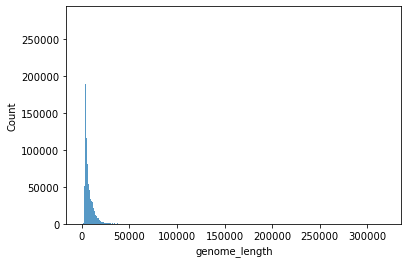

In [72]:
sns.histplot(data=protstats, x="genome_length", stat="count")

Text(0.5, 0, 'Proteome Length')

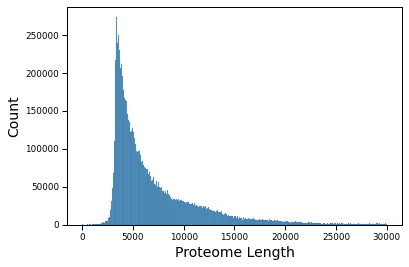

In [94]:
g = sns.histplot(data=protstats[protstats["genome_length"] < 30000], x="genome_length", stat="count")
plt.ylabel("Count", size=14)
plt.xlabel("Proteome Length", size=14)

<AxesSubplot:xlabel='num_hashes', ylabel='Count'>

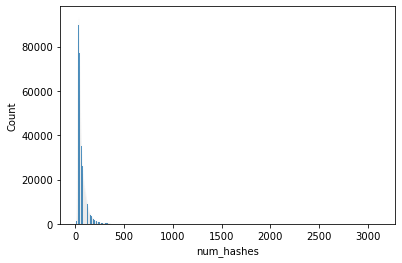

In [85]:
sns.histplot(data=protstats[protstats["scaled"] ==100], x="num_hashes", stat="count")

<AxesSubplot:xlabel='num_hashes', ylabel='Count'>

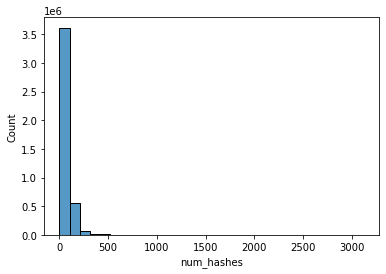

In [86]:
sns.histplot(data=protstats[protstats["scaled"] ==100], x="num_hashes", stat="count", bins=30)

In [124]:
protstats[(protstats.num_hashes < 5) & (protstats.scaled == 100) & (protstats.ksize == 7)]

,name,ksize,scaled,num_hashes,genome_length
277152,SPRUCE_viral_seq_2887,7,100,0,280
381504,SPRUCE_viral_seq_3974,7,100,1,68
1450464,virsorter_curated_7083,7,100,3,878
1450656,bacterial_refsq_112,7,100,4,860
1451328,bacterial_refsq_116,7,100,4,655
1451616,virsorter_curated_7092,7,100,4,695
1451712,virsorter_curated_7093,7,100,4,296
6105504,GOV_28529,7,100,0,32
14223264,GOV_85769,7,100,0,54


In [125]:
protstats[(protstats.num_hashes < 5) & (protstats.scaled == 100) & (protstats.ksize == 10)]

,name,ksize,scaled,num_hashes,genome_length
381522,SPRUCE_viral_seq_3974,10,100,1,68
1450194,virsorter_curated_7080,10,100,3,832
1450386,virsorter_curated_7082,10,100,2,813
1450482,virsorter_curated_7083,10,100,4,878
1450866,virsorter_curated_7085,10,100,2,644
1451058,bacterial_refsq_474,10,100,2,725
1451442,virsorter_curated_7089,10,100,4,521
1451730,virsorter_curated_7093,10,100,0,296
1451826,virsorter_curated_7094,10,100,3,535
2804274,GOV_7772,10,100,2,450


In [126]:
# include zero-length proteomes:
prot_stats[(prot_stats.num_hashes < 5) & (prot_stats.scaled == 100) & (prot_stats.ksize == 7)]

,name,ksize,scaled,num_hashes,genome_length
277152,SPRUCE_viral_seq_2887,7,100,0,280
381504,SPRUCE_viral_seq_3974,7,100,1,68
1450464,virsorter_curated_7083,7,100,3,878
1450656,bacterial_refsq_112,7,100,4,860
1451328,bacterial_refsq_116,7,100,4,655
1451616,virsorter_curated_7092,7,100,4,695
1451712,virsorter_curated_7093,7,100,4,296
6105504,GOV_28529,7,100,0,32
8097888,GOV_42426,7,100,0,0
12995424,GOV_77033,7,100,0,0


In [127]:
# include zero-length proteomes:
prot_stats[(prot_stats.num_hashes < 5) & (prot_stats.scaled == 100) & (prot_stats.ksize == 10)]

,name,ksize,scaled,num_hashes,genome_length
381522,SPRUCE_viral_seq_3974,10,100,1,68
1450194,virsorter_curated_7080,10,100,3,832
1450386,virsorter_curated_7082,10,100,2,813
1450482,virsorter_curated_7083,10,100,4,878
1450866,virsorter_curated_7085,10,100,2,644
1451058,bacterial_refsq_474,10,100,2,725
1451442,virsorter_curated_7089,10,100,4,521
1451730,virsorter_curated_7093,10,100,0,296
1451826,virsorter_curated_7094,10,100,3,535
2804274,GOV_7772,10,100,2,450


In [128]:
# include zero-length proteomes + look at dayhoff instead, k17:
prot_stats[(prot_stats.num_hashes < 5) & (prot_stats.scaled == 100) & (prot_stats.ksize == 17)]

,name,ksize,scaled,num_hashes,genome_length
277200,SPRUCE_viral_seq_2887,17,100,0,280
381552,SPRUCE_viral_seq_3974,17,100,0,68
1440720,virsorter_curated_7033,17,100,4,1334
1445808,bacterial_refsq_97,17,100,2,1332
1447248,virsorter_curated_7061,17,100,4,1041
1450224,virsorter_curated_7080,17,100,2,832
1450416,virsorter_curated_7082,17,100,1,813
1450512,virsorter_curated_7083,17,100,3,878
1451376,bacterial_refsq_116,17,100,4,655
1451472,virsorter_curated_7089,17,100,4,521


In [129]:
# include zero-length proteomes + look at dayhoff instead, k19:
prot_stats[(prot_stats.num_hashes < 5) & (prot_stats.scaled == 100) & (prot_stats.ksize == 19)]

,name,ksize,scaled,num_hashes,genome_length
277212,SPRUCE_viral_seq_2887,19,100,1,280
381564,SPRUCE_viral_seq_3974,19,100,0,68
1442748,bacterial_refsq_1424,19,100,3,1547
1450044,virsorter_curated_7079,19,100,4,872
1450524,virsorter_curated_7083,19,100,4,878
1450716,bacterial_refsq_112,19,100,4,860
1451772,virsorter_curated_7093,19,100,0,296
1451868,virsorter_curated_7094,19,100,3,535
6105564,GOV_28529,19,100,0,32
8097948,GOV_42426,19,100,0,0


In [136]:
dayhoff_only = prot_stats[(prot_stats["ksize"] > 15) & (prot_stats["ksize"] < 20) & (prot_stats["scaled"] < 10000)]

In [137]:
dayhoff_only

,name,ksize,scaled,num_hashes,genome_length
42,SPRUCE_viral_seq_0,16,100,2981,319532
43,SPRUCE_viral_seq_0,16,200,1513,319532
44,SPRUCE_viral_seq_0,16,500,605,319532
45,SPRUCE_viral_seq_0,16,1000,320,319532
46,SPRUCE_viral_seq_0,16,2000,169,319532
...,...,...,...,...,...
25613244,EarthsVirome_55316,19,100,35,3233
25613245,EarthsVirome_55316,19,200,14,3233
25613246,EarthsVirome_55316,19,500,7,3233
25613247,EarthsVirome_55316,19,1000,5,3233


In [138]:
daystats = dayhoff_only.groupby(by=["ksize", "scaled"], dropna=False)

In [139]:
daystats["num_hashes"].describe()

count       mean        std  min   25%   50%   75%     max
ksize scaled                                                               
16    100     266805.0  69.716017  59.737306  0.0  37.0  52.0  83.0  2981.0
      200     266805.0  34.859163  30.123023  0.0  19.0  26.0  42.0  1513.0
      500     266805.0  13.962741  12.405749  0.0   7.0  11.0  17.0   605.0
      1000    266805.0   6.987568   6.480776  0.0   3.0   5.0   9.0   320.0
      2000    266805.0   3.491524   3.511050  0.0   1.0   3.0   5.0   169.0
17    100     266805.0  69.471618  59.520736  0.0  37.0  51.0  83.0  2917.0
      200     266805.0  34.750807  30.038920  0.0  18.0  26.0  41.0  1449.0
      500     266805.0  13.892701  12.328304  0.0   7.0  11.0  17.0   566.0
      1000    266805.0   6.950098   6.461979  0.0   3.0   5.0   9.0   295.0
      2000    266805.0   3.475220   3.488853  0.0   1.0   3.0   5.0   150.0
18    100     266805.0  69.206383  59.420494  0.0  37.0  51.0  82.0  2947.0
      200     266805.0  34.631750  29.984461  0.0  18.0  26.0  41.0  1439.0
      500     266805.0  13.853721  12.362440  0.0   7.0  11.0  17.0   591.0
      1000    266805.0   6.951185   6.461913  0.0   3.0   5.0   9.0   284.0
      2000    266805.0   3.472750   3.483217  0.0   1.0   3.0   5.0   154.0
19    100     266805.0  68.823185  59.173101  0.0  37.0  51.0  82.0  2926.0
      200     266805.0  34.423017  29.870180  0.0  18.0  26.0  41.0  1487.0
      500     266805.0  13.707524  12.246668  0.0   7.0  10.0  17.0   578.0
      1000    266805.0   6.861067   6.402954  0.0   3.0   5.0   9.0   290.0
      2000    266805.0   3.423901   3.453697  0.0   1.0   3.0   4.0   159.0

In [143]:
# get number of zero hashes for dayhoff scaled=100
dayhoff_only[(dayhoff_only.num_hashes ==0)].groupby(by=["ksize", "scaled"], dropna=False)["num_hashes"].count()

ksize  scaled
16     100           5
       200          11
       500         185
       1000       3911
       2000      24531
17     100           7
       200          10
       500         199
       1000       3997
       2000      24576
18     100           5
       200          11
       500         205
       1000       4018
       2000      24349
19     100           7
       200          10
       500         229
       1000       4199
       2000      25101
Name: num_hashes, dtype: int64

In [144]:
# less than 5 hashes
dayhoff_only[(dayhoff_only.num_hashes <5)].groupby(by=["ksize", "scaled"], dropna=False)["num_hashes"].count()

ksize  scaled
16     100           18
       200          155
       500        21028
       1000      106665
       2000      198530
17     100           23
       200          175
       500        21533
       1000      107675
       2000      199315
18     100           21
       200          174
       500        21874
       1000      107441
       2000      199107
19     100           14
       200          209
       500        22545
       1000      109334
       2000      200889
Name: num_hashes, dtype: int64